In [1]:
!pip install lightgbm

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
#read the data set
digits_train = pd.read_csv("train.csv")
digits_test = pd.read_csv("test.csv")
sample = pd.read_csv('submission.csv')

In [4]:
#head
digits_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
digits_test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
four = digits_train.iloc[3,1:]
four.shape

(784,)

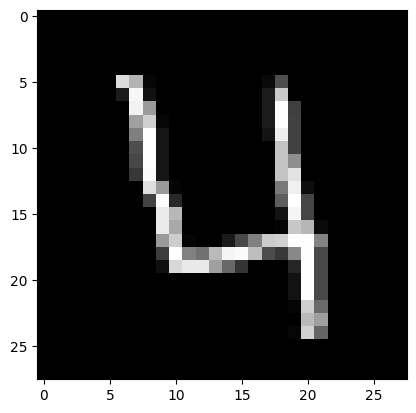

In [7]:
four= four.values.reshape(28,28)
plt.imshow(four,cmap='gray')
plt.show()

In [8]:
#visuallise the array
print(four[5:-5,5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [9]:
#avearage values/distributions of features
description = digits_train.describe()
description

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [10]:
num_class = len(digits_train.iloc[:,0].unique())

In [11]:
x_train= digits_train.iloc[:,1:]
y_train=digits_train.iloc[:,0]

x_test = digits_test.values
y_test=digits_test.iloc[:,0]

#rescaling the feature
from sklearn.preprocessing import scale
x_train = scale(x_train)
x_test=scale(x_test)

#print
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 784)
(28000, 784)
(42000,)
(28000,)


In [12]:
%%time

import lightgbm as lgb
print ('Training lightgbm')

lgtrain = lgb.Dataset(x_train, y_train)
lgval = lgb.Dataset(x_test, y_test)

# params multiclass
params = {
          "objective" : "multiclass",           
          "max_depth": -1,
           "num_class":num_class,
          "learning_rate" : 0.0001,                 
          "verbosity" : 1 }

model = lgb.train(params, lgtrain, 500, valid_sets=[lgtrain, lgval], early_stopping_rounds=750, verbose_eval=200)

Training lightgbm
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.218192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 108067
[LightGBM] [Info] Number of data points in the train set: 42000, number of used features: 620
[LightGBM] [Info] Start training from score -2.318908
[LightGBM] [Info] Start training from score -2.193517
[LightGBM] [Info] Start training from score -2.308076
[LightGBM] [Info] Start training from score -2.267264
[LightGBM] [Info] Start training from score -2.333535
[LightGBM] [Info] Start training from score -2.403985
[LightGBM] [Info] Start training from score -2.317699
[LightGBM] [Info] Start training from score -2.255838
[LightGBM] [Info] Start training from score -2.335748
[LightGBM] [Info] Start training from score -2.305446
Training until validation scores don't improve for 750 rounds
[200]	training's multi_logloss: 2.1769	valid_1's multi_logloss: 2.31798
[400]	trainin

In [13]:
%%time

# predict results
results = model.predict(x_test)

# select the index's with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission.csv",index=False)

Wall time: 3.61 s


In [14]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,1
4,5,1
